# WoMG: a Library for Word-of-Mouth Cascades Generation
## VLDB 2020 - demo

In [1]:
from womg import womg
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### Definition of the inputs: graph as NetworkX instance and corpus as directory path. 

In [24]:
N = 100
g = nx.random_geometric_graph(N, .2)
docs_path = 'demo_corpus/'

prop = womg(graph=g, int_mode='nmf', homophily=0., 
            virality_resistance=13, virality_exp=8., 
            infl_strength=12., gn_strength=13.5,
            docs_path=docs_path, save_int=True, 
            seed=42, single_activator=False)

Formatting graph..



Creating interests..
Training LDA model..
Extracting topic distribution from docs in  demo_corpus/
Computing cascades.. 
WoMG diffusion has been completed.


### Displaying the output with NetworkX

In [25]:
def plot_graph(g, node_color, cmap, ax=None):
    NODE_SIZE = 400
    #plt.figure(figsize=(8, 8))
    pos = nx.get_node_attributes(g, 'pos')
    
    if ax != None:
        nx.draw_networkx_edges(g, pos, alpha=0.4, ax=ax)
        nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_size=NODE_SIZE,
                               alpha=1.0,
                               node_color=node_color,
                               cmap=cmap,
                               edgecolors='k',
                               ax=ax
                              )
    else:
        nx.draw_networkx_edges(g, pos, alpha=0.4)
        nx.draw_networkx_nodes(g,
                               pos=pos,
                               node_size=NODE_SIZE,
                               alpha=1.0,
                               node_color=node_color,
                               cmap=cmap,
                               edgecolors='k',
                              )  

Firstly, we display the activated nodes

/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


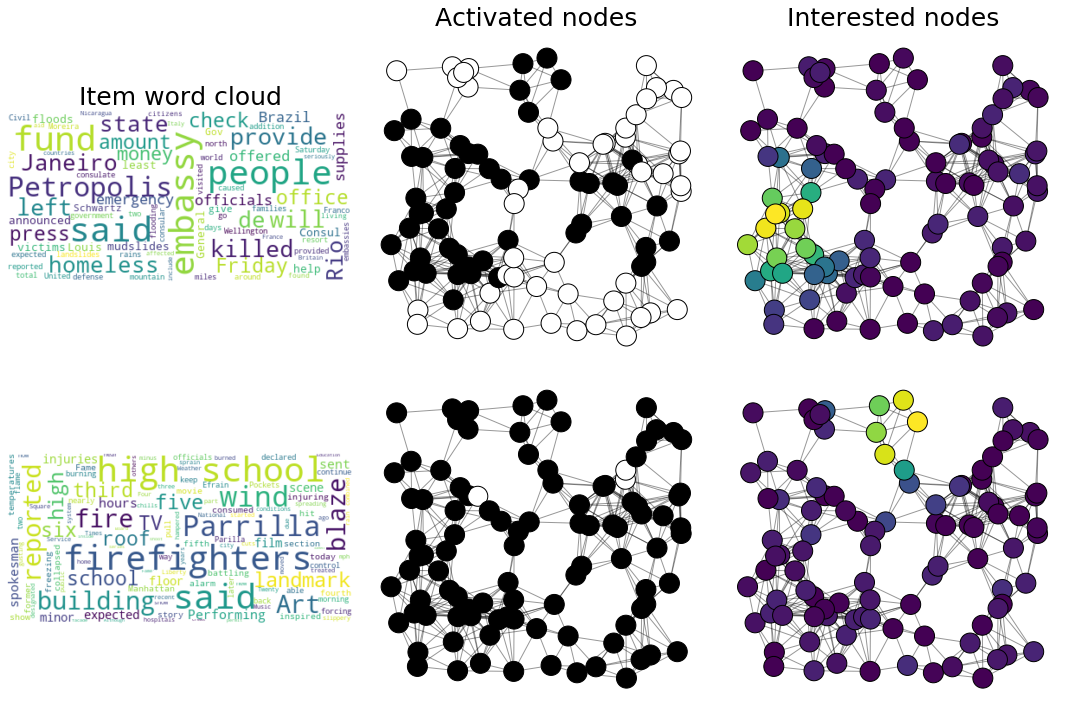

In [26]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

for item, title in enumerate((docs_path+'AP880212-0078.txt', docs_path+'AP880213-0055.txt')):
    for i, name in enumerate(('Item word cloud', 'Activated nodes', 'Interested nodes')):
        axs[0, i].set_title(name, fontsize=25)
            
        if i == 0:
            text = open(title).read()
            wordcloud = WordCloud().generate(text)
            wordcloud = WordCloud(max_font_size=40, background_color='white').generate(text)
            axs[item, i].imshow(wordcloud, interpolation="bilinear")
        elif i == 1:
            activations = np.zeros(N)
            active_nodes = [node for _time, node in prop.propagations[item]]
            activations[active_nodes] = 1
            plot_graph(g, activations, plt.cm.binary, axs[item, i])
        else:
            component = np.argmax(prop.topic_distributions[:,item])
            component_interest = [prop.interests[component,node] for node in range(N)]
            plot_graph(g, component_interest, None, axs[item, i])
        axs[item, i].axis('off')  
        
plt.tight_layout()
plt.savefig('propagation-plot.pdf')

demo_corpus/AP880212-0078.txt
51.0


/Users/Cinus/miniconda3/envs/womg-test/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


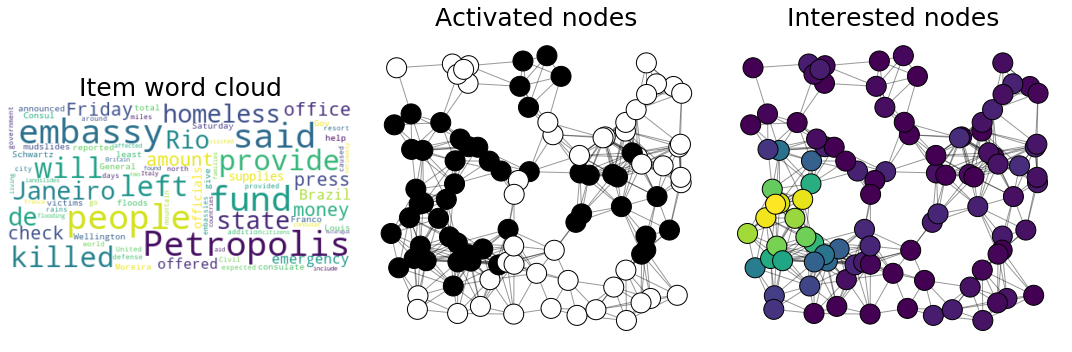

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

item, title = (0, str(docs_path+'AP880212-0078.txt'))#, docs_path+'AP880213-0055.txt')):
for i, name in enumerate(('Item word cloud', 'Activated nodes', 'Interested nodes')):
    axs[i].set_title(name, fontsize=25)

    if i == 0:
        print(title)
        text = open(title).read()
        wordcloud = WordCloud().generate(text)
        wordcloud = WordCloud(max_font_size=40, background_color='white').generate(text)
        axs[i].imshow(wordcloud, interpolation="bilinear")
    elif i == 1:
        activations = np.zeros(N)
        active_nodes = [node for _time, node in prop.propagations[item]]
        activations[active_nodes] = 1
        print(sum(activations))
        plot_graph(g, activations, plt.cm.binary, axs[i])
    else:
        component = np.argmax(prop.topic_distributions[:,item])
        component_interest = [prop.interests[component,node] for node in range(N)]
        plot_graph(g, component_interest, None, axs[i])
    axs[i].axis('off')  
        
plt.tight_layout()
plt.savefig('propagation-plot-h0-gn13e5-res13.pdf')